# Selection of rules

With increasing number of transcription factors, co-occurrence analysis generally yields thousand of rules, which makes interpretation difficult. In this notebook, we will show how some different methods to select rules of interest from the original analysis. We will use the same data as within the 'chipseq analysis' notebook:

In [1]:
import tfcomb.objects
C = tfcomb.objects.CombObj().from_pickle("../data/GM12878.pkl")

In [2]:
C

<CombObj: 112109 TFBS (151 unique names) | Market basket analysis: 10642 rules>

----------

## Select rules using co-occurrence measures

In this example, we will use the function .select_significant_rules() to select rules based on two measures. Default for this function are the "zscore" and "cosine" measures.

INFO: x_threshold is None; trying to calculate optimal threshold
INFO: y_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of TFBS and rules using thresholds


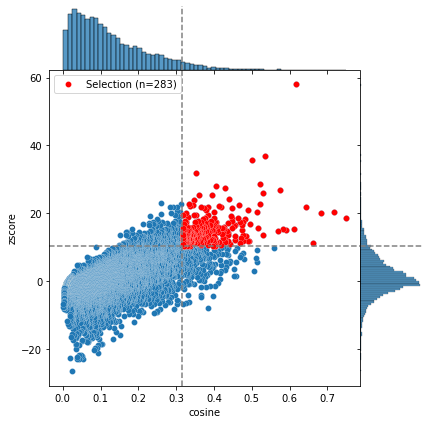

In [3]:
selected = C.select_significant_rules()

The function returns an instance of a CombObj containing only the selected rules and TFBS for the TFs within .rules:

In [13]:
selected

<CombObj: 83705 TFBS (151 unique names) | Market basket analysis: 283 rules>

In [14]:
selected.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
RAD21-CTCF,RAD21,CTCF,1751,2241,2432,0.750038,18.643056
RAD21-SMC3,RAD21,SMC3,1376,2241,1638,0.718192,20.314026
SMC3-CTCF,SMC3,CTCF,1361,1638,2432,0.681898,20.245177
IKZF1-IKZF2,IKZF1,IKZF2,1726,2922,2324,0.662343,11.215960
ZNF143-SMC3,ZNF143,SMC3,1060,1652,1638,0.644383,21.838431
...,...,...,...,...,...,...,...
MTA3-GABPA,MTA3,GABPA,216,692,666,0.318173,12.609150
STAT5A-CBFB,STAT5A,CBFB,195,454,829,0.317855,15.633269
GABPA-NFATC1,GABPA,NFATC1,214,666,681,0.317763,13.977084
ETS1-TAF1,ETS1,TAF1,166,424,644,0.317674,13.702745


We will save this object for use in other notebooks:

In [5]:
selected.to_pickle("../data/GM12878_selected.pkl")

------------

## Select top rules

We can also use the function _.select_top_rules()_ to select the first _n_ rules from .rules: 

In [16]:
selected2 = C.select_top_rules(n=100)

In [17]:
selected2.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
RAD21-CTCF,RAD21,CTCF,1751,2241,2432,0.750038,18.643056
RAD21-SMC3,RAD21,SMC3,1376,2241,1638,0.718192,20.314026
SMC3-CTCF,SMC3,CTCF,1361,1638,2432,0.681898,20.245177
IKZF1-IKZF2,IKZF1,IKZF2,1726,2922,2324,0.662343,11.215960
ZNF143-SMC3,ZNF143,SMC3,1060,1652,1638,0.644383,21.838431
...,...,...,...,...,...,...,...
IKZF1-NFATC3,IKZF1,NFATC3,770,2922,1167,0.416980,6.271326
ATF7-IKZF2,ATF7,IKZF2,908,2061,2324,0.414886,2.376816
DPF2-IKZF1,DPF2,IKZF1,963,1844,2922,0.414864,0.597690
EP300-ATF2,EP300,ATF2,484,922,1484,0.413774,11.601051


--------------

## Select rules based on a list of TF names

If you are only interested in the rules concerning a list of TFs, it is possible to use _.select_TF_rules to subset the rules to a subset of TF names. Here, we create a subset of rules containing the TFs in TF_list:

In [7]:
TF_list = ["ELK1", "CTCF", "ZNF143", "YY1"]

In [8]:
selected3 = C.select_TF_rules(TF_list)

INFO: Selected 6 rules
INFO: Creating subset of object


In [9]:
selected3

<CombObj: 5686 TFBS (151 unique names) | Market basket analysis: 6 rules>

In [10]:
selected3.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
CTCF-ZNF143,CTCF,ZNF143,1170,2432,1652,0.583713,15.459923
YY1-ZNF143,YY1,ZNF143,555,1365,1652,0.369591,6.797111
YY1-CTCF,YY1,CTCF,481,1365,2432,0.263996,-3.079479
YY1-ELK1,YY1,ELK1,88,1365,237,0.154718,4.946988
ELK1-ZNF143,ELK1,ZNF143,95,237,1652,0.151825,3.295755
CTCF-ELK1,CTCF,ELK1,28,2432,237,0.036881,-6.360275


It is also possible to specify that the rules should only be selected from matches to TF1 (by setting TF2=False):

In [11]:
selected3 = C.select_TF_rules(TF_list, TF2=False)

INFO: Selected 295 rules
INFO: Creating subset of object


In [12]:
selected3.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
ZNF143-SMC3,ZNF143,SMC3,1060,1652,1638,0.644383,21.838431
CTCF-ZNF143,CTCF,ZNF143,1170,2432,1652,0.583713,15.459923
ZNF143-TRIM22,ZNF143,TRIM22,843,1652,1786,0.490774,11.816354
CTCF-TRIM22,CTCF,TRIM22,900,2432,1786,0.431837,4.237106
YY1-ZNF143,YY1,ZNF143,555,1365,1652,0.369591,6.797111
...,...,...,...,...,...,...,...
CTCF-CEBPB,CTCF,CEBPB,6,2432,273,0.007364,-7.583370
ZNF143-EZH2,ZNF143,EZH2,3,1652,103,0.007273,-4.149992
ZNF143-CHD4,ZNF143,CHD4,2,1652,47,0.007178,-2.446518
CTCF-ZZZ3,CTCF,ZZZ3,1,2432,32,0.003585,-2.896546
